# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## First, do the necessary set-up (run the code block below, first)

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
# NB Recent versions of IPython require that "ipywidgets" be installed separately for the import line below to work.
from IPython.html.widgets import interact, interactive, fixed
from IPython.html.widgets.interaction import interact_manual
from IPython.html import widgets
from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import Implementation as imp

%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Low_old, Telescopes.SKA1_Mid, Telescopes.SKA1_Mid_old, 
                   Telescopes.SKA1_Sur_old, Telescopes.SKA2_Low, Telescopes.SKA2_Mid)
available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)
available_modes     = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg)
available_modes_all = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg, ImagingModes.All)
verbose_display = False

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Using default values, we can compare telescopes side-by-side

Max baseline = 80000
Max baseline = 80000


Telescope,SKA1_Low_rebaselined,SKA1_Low_rebaselined,
Band,Low,Low,
Mode,Continuum,Continuum,
Baseline Dependent Time Avg.,True,True,
Max Baseline,80000,80000,m
Max # channels,65536,65536,
Optimal Number of Facets,1,1,
Optimal Snapshot Time,56.5,56.5,sec.
Image side length,44155,44155,pixels
Visibility Buffer,7.62,7.62,PetaBytes
Working (cache) memory,28.5,28.5,TeraBytes


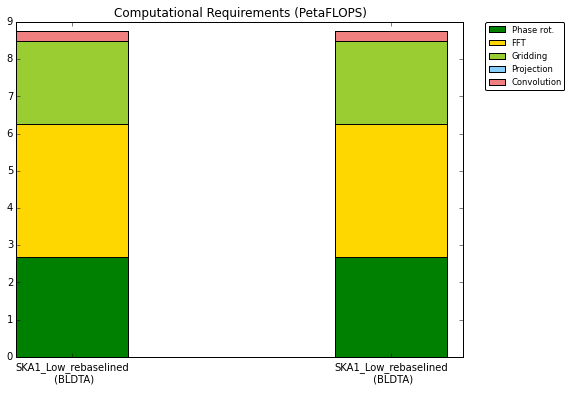

In [3]:
interact_manual(iapi.compare_telescopes_default, 
                telescope_1=available_teles, telescope_2=available_teles, band_1=available_bands,
                band_2=available_bands, mode_1=available_modes_all, mode_2=available_modes_all,
                verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

Max Baseline,53153 m
Max # of channels,128000
Telescope,SKA1_Low_rebaselined
Band,Low
Mode,Continuum
Tsnap,106.4 sec
Nfacet,1


Image side length(s),32787 pixels
Visibility Buffer,4.31 PetaBytes
Working (cache) memory,22.2 TeraBytes
I/O Rate,1.1 TeraBytes/s
Total Compute Requirement,7.62 PetaFLOPS
-> Gridding,1.87 PetaFLOPS
-> FFT,0.593 PetaFLOPS
-> Phase Rotation,0 PetaFLOPS
-> Projection,0.0808 PetaFLOPS
-> Convolution,5.08 PetaFLOPS


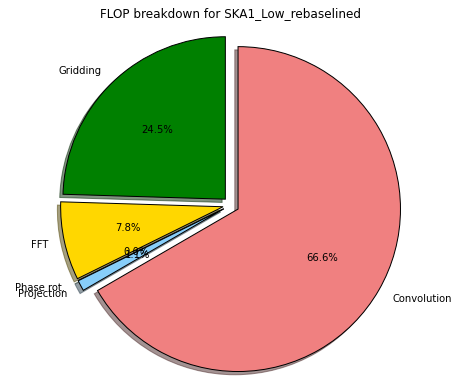

In [3]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10000,200000), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         telescope=available_teles, band=available_bands, mode=available_modes_all, verbose=verbose_display);

### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

Max Baseline,105000 m
Max # of channels,128000
Telescope,SKA1_Mid_rebaselined
Band,Mid1
Mode,Spectral


Max baseline = 105000


Optimal Number(s) of Facets,4
Optimal Snapshot Time(s),633.3 sec.
Image side length(s),21261 pixels
Visibility Buffer,4.62 PetaBytes
Working (cache) memory,1.49e+03 TeraBytes
I/O Rate,4.28 TeraBytes/s
Total Compute Requirement,8.83 PetaFLOPS
-> Gridding,2.33 PetaFLOPS
-> FFT,1.05 PetaFLOPS
-> Phase Rotation,0.00643 PetaFLOPS
-> Projection,4.39 PetaFLOPS


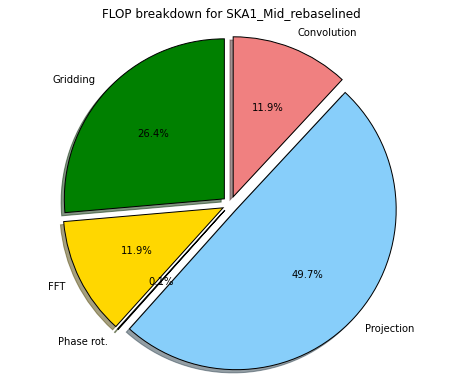

In [4]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10000,200000), Nf_max = (1,256000,1), telescope=available_teles, 
         band=available_bands, mode=available_modes_all, verbose=verbose_display);

## illustrating 1D "parameter sweep" + visualization functionality.

Starting sweep of parameter Ds, evaluating expression Rflop over range (10, 50) in 10 steps (i.e. 11 data points)
> 0.0% done: Evaluating Rflop for Ds = 10
> 9.1% done: Evaluating Rflop for Ds = 14
> 18.2% done: Evaluating Rflop for Ds = 18
> 27.3% done: Evaluating Rflop for Ds = 22
> 36.4% done: Evaluating Rflop for Ds = 26
> 45.5% done: Evaluating Rflop for Ds = 30
> 54.5% done: Evaluating Rflop for Ds = 34
> 63.6% done: Evaluating Rflop for Ds = 38
> 72.7% done: Evaluating Rflop for Ds = 42
> 81.8% done: Evaluating Rflop for Ds = 46
> 90.9% done: Evaluating Rflop for Ds = 50
done with parameter sweep!


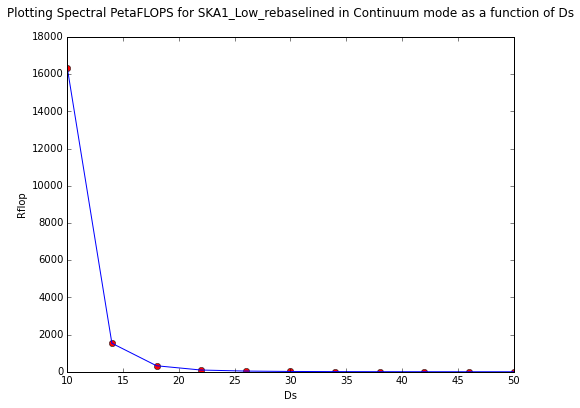

10.0 , 16348.8032844
14.0 , 1535.17504092
18.0 , 324.646162276
22.0 , 94.6742736488
26.0 , 39.3106462546
30.0 , 18.9023446635
34.0 , 10.0558303811
38.0 , 5.90520956437
42.0 , 3.66367330681
46.0 , 2.37561398086
50.0 , 1.56281999567


In [5]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'Ds'
param_val_min =10
param_val_max = 50
number_steps = 10
telescope = Telescopes.SKA1_Low
immode = ImagingModes.Continuum
band=Bands.Low

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(param_values, results) = iapi.eval_param_sweep_1d(telescope, immode, band=band, 
                                                   expression=expression, parameter=parameter, param_val_min=param_val_min,
                                                   param_val_max=param_val_max, number_steps=number_steps, verbose=False)
header = 'Plotting Spectral PetaFLOPS for %s in %s mode as a function of %s' % (telescope, immode, parameter)
iapi.plot_line_datapoints(header, param_values, np.array(results)/c.peta, xlabel=parameter, ylabel=expression)

for i in range(len(param_values)):
               print param_values[i], ",", (results[i])/c.peta

## illustrating 2D "parameter sweep" + visualization functionality.

Evaluating expression Rflop while
sweeping parameters Na and Ds over 2D domain [500, 3000] x [10, 35] in 5 steps each,
for a total of 36 data evaluation points
> 0.0% done: Evaluating Rflop for (Na, Ds) = (500.0, 10.0)
> 2.8% done: Evaluating Rflop for (Na, Ds) = (500.0, 15.0)
> 5.6% done: Evaluating Rflop for (Na, Ds) = (500.0, 20.0)
> 8.3% done: Evaluating Rflop for (Na, Ds) = (500.0, 25.0)
> 11.1% done: Evaluating Rflop for (Na, Ds) = (500.0, 30.0)
> 13.9% done: Evaluating Rflop for (Na, Ds) = (500.0, 35.0)
> 16.7% done: Evaluating Rflop for (Na, Ds) = (1000.0, 10.0)
> 19.4% done: Evaluating Rflop for (Na, Ds) = (1000.0, 15.0)
> 22.2% done: Evaluating Rflop for (Na, Ds) = (1000.0, 20.0)
> 25.0% done: Evaluating Rflop for (Na, Ds) = (1000.0, 25.0)
> 27.8% done: Evaluating Rflop for (Na, Ds) = (1000.0, 30.0)
> 30.6% done: Evaluating Rflop for (Na, Ds) = (1000.0, 35.0)
> 33.3% done: Evaluating Rflop for (Na, Ds) = (1500.0, 10.0)
> 36.1% done: Evaluating Rflop for (Na, Ds) = (1500.0, 15

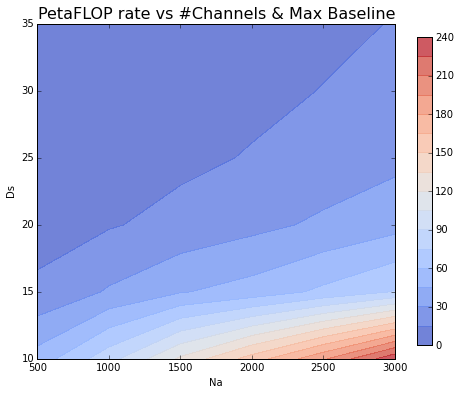

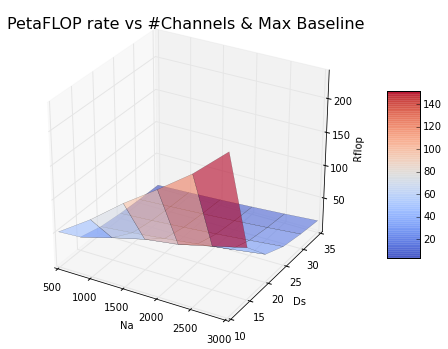

In [7]:
from IPython.display import display, HTML

telescope = Telescopes.SKA1_Low
band = Bands.Low
immode = ImagingModes.Spectral
expression = 'Rflop'
parameters = ('Na', 'Ds')
parameter_ranges = ((500,3000),(10,35))
number_steps = 5
verbose = False

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(p1_values, p2_values, results) = iapi.eval_param_sweep_2d(telescope, immode, band=band, 
                                                           expression=expression, parameters=parameters, 
                                                           params_ranges=parameter_ranges, number_steps=number_steps, 
                                                           verbose=verbose)


iapi.plot_2D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], contours=np.array((0.5, 1.0)))
iapi.plot_3D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], zlabel=expression, contours=np.array((0.5, 1.0)))